# This is a document meant for figuring out how to grab and graph data from
# a FITS file

In [26]:
import matplotlib as mpl
import astropy as ap
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from astropy.table import Table

In [27]:
fits_file = "/Users/asherworley/Downloads/maps_catalog.fits"

In [28]:
fits.info(fits_file)

Filename: /Users/asherworley/Downloads/maps_catalog.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU    117   4161R x 50C   [19A, D, D, D, D, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 24A, E, E, J, E, E, E, E, E, E, E, E, E, E, E, E, 16A, 19A, 8A, D]   


In [29]:
off = fits.open(fits_file)

In [30]:
off.info()

Filename: /Users/asherworley/Downloads/maps_catalog.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU    117   4161R x 50C   [19A, D, D, D, D, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 24A, E, E, J, E, E, E, E, E, E, E, E, E, E, E, E, 16A, 19A, 8A, D]   


In [31]:
print(off[1].columns)

ColDefs(
    name = 'ID'; format = '19A'
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'LON'; format = 'D'
    name = 'LAT'; format = 'D'
    name = 'MLON'; format = 'E'
    name = 'MLAT'; format = 'E'
    name = 'PA'; format = 'E'
    name = 'RAD'; format = 'E'
    name = 'D'; format = 'E'
    name = 'DERR'; format = 'E'
    name = 'M'; format = 'E'
    name = 'MERR'; format = 'E'
    name = 'T'; format = 'E'
    name = 'TERR'; format = 'E'
    name = 'M0'; format = 'E'
    name = 'MT0'; format = 'E'
    name = 'MD0'; format = 'E'
    name = 'AM'; format = 'E'
    name = 'EBV'; format = 'E'
    name = 'CHI'; format = 'E'
    name = 'SHARP'; format = 'E'
    name = 'VHELIO'; format = 'E'
    name = 'VLSR'; format = 'E'
    name = 'VGSR'; format = 'E'
    name = 'VERR'; format = 'E'
    name = 'STDDEV'; format = 'E'
    name = 'Q'; format = 'E'
    name = 'SET'; format = 'E'
    name = 'TDR'; format = 'E'
    name = 'FILE'; format = '24A'
    name = 'SNR'; form

In [32]:
off_table = Table(off[1].data)

In [33]:
off_table

ID,RA,DEC,LON,LAT,MLON,MLAT,PA,RAD,D,DERR,M,MERR,T,TERR,M0,MT0,MD0,AM,EBV,CHI,SHARP,VHELIO,VLSR,VGSR,VERR,STDDEV,Q,SET,TDR,FILE,SNR,PEAK,NSTD,TEFF,LOGG,FEH,ALPHAFE,LOGMICRO,TEFF_ERR,LOGG_ERR,FEH_ERR,ALPHAFE_ERR,LOGMICRO_ERR,LOGCHI2,RV,SNAME,SID,FIELD,HJD
str19,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str24,float32,float32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str16,str19,str8,float64
NEa1_2.10479,87.62960667,-62.256113333,271.3949890136719,-30.823999404907227,2.61515,9.915174,19.636232,7.949376,18.79676,0.084,18.86764,0.044,18.85384,0.135,18.703,-0.063,0.068,0.16464001,0.048,999999.0,0.009,-557.5372,-569.8668,-758.7348,24.224688,4426.449,999999.0,1.0,2.84,NEa1_2.10479.fits,8.2,0.07,48,3604.694,3.197,-4.922,-0.19,-0.274,709.953,2.952,3.414,30.019,22.553,-2.738,-557.54,NEa1_2.10479,NEa1_2.10479,,2453074.50215658
NEa1_2.1102,87.209736255,-62.197510278,271.32598876953125,-31.018999099731445,2.420383,9.983928,18.162144,7.9594665,16.740501,0.077,16.7365,0.021,15.7155,0.025,16.565,0.941,-0.007,0.17150001,0.05,999999.0,-0.067,92.45354,80.115654,-108.373085,16.851955,57.988846,999999.0,1.0,4.52,NEa1_2.1102.fits,7.919,0.09,35,7106.522,5.0,1.0,0.999,-0.256,239.504,0.422,0.481,3.508,1.711,-3.126,92.454,NEa1_2.1102,NEa1_2.1102,,2453074.50213802
NEa1_2.11414,87.67963959,-62.128181944,271.2460021972656,-30.798999786376953,2.6469185,10.041741,19.571278,8.079103,17.49839,0.078,17.45821,0.023,15.76501,0.025,17.297,1.618,-0.044,0.16121,0.047,999999.0,0.258,311.4647,299.1142,110.185745,3.649384,4.5321827,999999.0,1.0,24.49,NEa1_2.11414.fits,21.879,0.38,39,4257.56,1.633,-0.564,0.088,0.042,58.991,0.193,0.085,0.059,0.055,-5.417,311.46,NEa1_2.11414,NEa1_2.11414,,2453074.50216071
NEa1_2.12134,87.711117495,-62.21084,271.3420104980469,-30.78499984741211,2.656996,9.958678,19.819876,8.002689,17.60639,0.078,17.599209,0.023,15.98801,0.025,17.438,1.537,-0.01,0.16121,0.047,999999.0,0.049,327.13184,314.79456,125.84575,3.858266,4.580862,999999.0,1.0,23.11,NEa1_2.12134.fits,23.54,0.41,38,4451.168,1.779,-0.895,0.122,0.184,80.506,0.213,0.089,0.086,0.054,-5.484,327.13,NEa1_2.12134,NEa1_2.12134,,2453074.50216099
NEa1_2.12568,87.73164417,-62.262825278,271.40301513671875,-30.775999069213867,2.6634655,9.905883,19.980747,7.9547806,17.38002,0.078,17.35878,0.022,15.44518,0.024,17.201,1.84,-0.024,0.15778,0.046,999999.0,-0.023,313.30737,300.97852,112.01684,3.10076,4.901201,999999.0,1.0,29.0,NEa1_2.12568.fits,27.947,0.45,39,4138.388,1.725,-1.078,0.072,0.308,42.396,0.137,0.061,0.057,0.031,-5.494,313.31,NEa1_2.12568,NEa1_2.12568,,2453074.50216119
NEa1_2.12813,87.743740005,-62.197411111,271.3269958496094,-30.770000457763672,2.6728563,9.9708185,19.901382,8.019505,18.90639,0.086,18.96221,0.048,19.04701,0.168,18.801,-0.16,0.053,0.16121,0.047,999999.0,-0.016,-11897.378,-11909.718,-12098.697,17.958069,9.762134,999999.0,1.0,4.18,NEa1_2.12813.fits,8.966,0.1,34,5997.359,0.016,-3.24,0.826,-0.159,9941.646,1.459,3.143,3.099,3.656,-3.529,363.07,NEa1_2.12813,NEa1_2.12813,,2453074.50216269
NEa1_2.13211,87.759171255,-62.271493333,271.4129943847656,-30.76300048828125,2.6762064,9.896666,20.086191,7.949641,16.89902,0.077,16.84778,0.021,14.62118,0.024,16.69,2.153,-0.054,0.15778,0.046,999999.0,-0.008,335.42828,323.10074,134.11433,3.7860317,4.843817,999999.0,1.0,23.57,NEa1_2.13211.fits,22.259,0.32,38,4021.705,0.52,-0.284,-0.069,-0.125,35.053,0.182,0.083,0.041,0.053,-4.724,335.43,NEa1_2.13211,NEa1_2.13211,,2453074.50216233
NEa1_2.13292,87.76675291500001,-62.132236389,271.2510070800781,-30.759000778198242,2.6872776,10.035493,19.859009,8.085292,17.257019,0.078,17.207779,0.023,15.37518,0.024,17.05,1.759,-0.053,0.15778,0.046,999999.0,0.147,321.5623,309.21225,120.20556,3.3900435,5.044258,999999.0,1.0,26.44,NEa1_2.13292.fits,29.382,0.38,39,4060.76,1.171,-

In [34]:
RA = off_table["RA"]

# Note to self: RA(Right ascension) is measured in time(probably seconds here?)

In [35]:
DEC = off_table["DEC"]

# Note to self: DEC(Declination) is measured in degrees

In [36]:
RA_list = []
for entry in RA:
    RA_list.append(entry)

In [37]:
DEC_list = []
for entry in DEC:
    DEC_list.append(entry)


Text(0,0.5,'DEC')

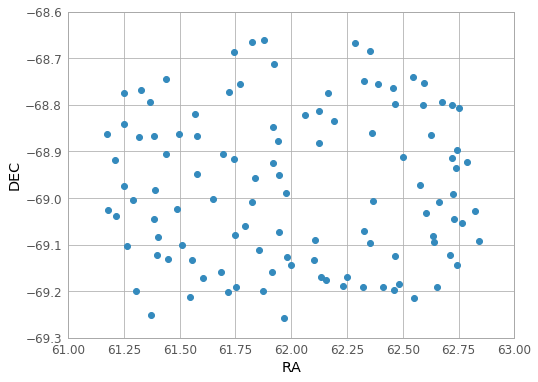

In [38]:
plt.scatter(RA_list, DEC_list)
plt.xlim(61, 63)
plt.ylim(-69.3, -68.6)
plt.xlabel("RA")
plt.ylabel("DEC")

In [39]:
TEFF = off_table["TEFF"]

In [40]:
LOGG = off_table["LOGG"]

In [41]:
##I noticed some data that was showing LOGG and TEFF to be 999999.0. Also, some values for LGG were -5.0. I considered 
##that to be unreasonable, so this block of code culls those entries out.

LOGG_list = []
nums_to_be_taken_out = []
x = 0
for entry in LOGG:

    if entry != 999999.0:
            LOGG_list.append(entry)
    else:
        nums_to_be_taken_out.append(x)
    
    x += 1

In [42]:
TEFF_list = []
nums_to_be_taken_out_again = []
y = 0
for entry in TEFF:
    if entry != 999999.0:
        TEFF_list.append(entry)
    else:
        nums_to_be_taken_out_again.append(y)
    
    y += 1

# This line of code is to see if the extreme values for LOGG and TEFF were from the same source. They were.


In [43]:
nums_to_be_taken_out == nums_to_be_taken_out_again

True

Text(0,0.5,'LOGG')

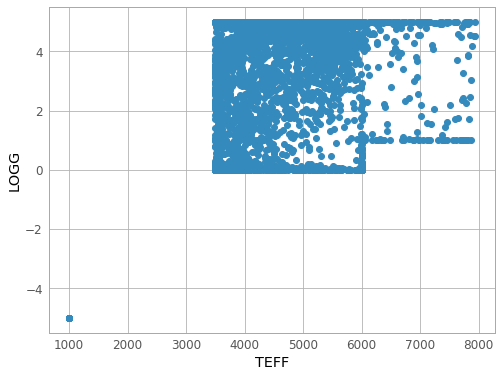

In [44]:
plt.scatter(TEFF_list, LOGG_list)

plt.xlabel("TEFF")
plt.ylabel("LOGG")

# Negative LOGG? Odd. The following code is to take those out.




In [45]:
nums_to_be_taken_out_again_for_the_third_time = []
x = 0
for entry in LOGG_list:
    if entry == -5.0:
        nums_to_be_taken_out_again_for_the_third_time.append(x)
    x += 1
    
x = 0
for entry in nums_to_be_taken_out_again_for_the_third_time:
    del LOGG_list[entry + x]
    del TEFF_list[entry + x]
    x -= 1


Text(0,0.5,'LOGG')

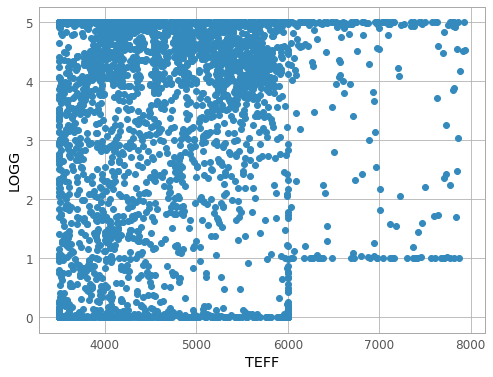

In [46]:
plt.scatter(TEFF_list, LOGG_list)

plt.xlabel("TEFF")
plt.ylabel("LOGG")

In [47]:
FEH = off_table["FEH"]

Text(0.5,0,'FEH')

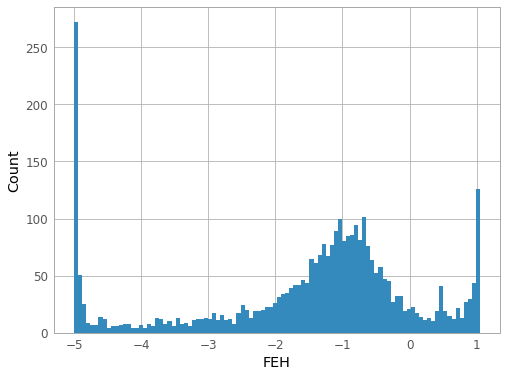

In [49]:
plt.hist(FEH, 100, (-5, 1.05))
plt.ylabel("Count")
plt.xlabel("FEH")

# Now I'm going to find the radius of the stars based on the Mass and LOGG


    

In [50]:
MASS = off_table["M"]
MASS_list = []

for entry in MASS:
    MASS_list.append(entry)

# Graphing the mass numbers to check for any strange entries



(array([254.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   3.,   5.,   8.,  10.,  14.,  34.,  40.,  91., 153.,
        203., 235., 298., 265., 285., 312., 275., 268., 300., 347., 267.,
        247., 119., 100.,  23.,   2.,   2.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.]),
 array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,
         2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ,  4.25,
         4.5 ,  4.75,  5.  ,  5.25,  5.5 ,  5.75,  6.  ,  6.25,  6.5 ,
         6.75,  7.  ,  7.25,  7.5 ,  7.75,  8.  ,  8.25,  8.5 ,  8.75,
         9.  ,  9.25,  9.5 ,  9.75

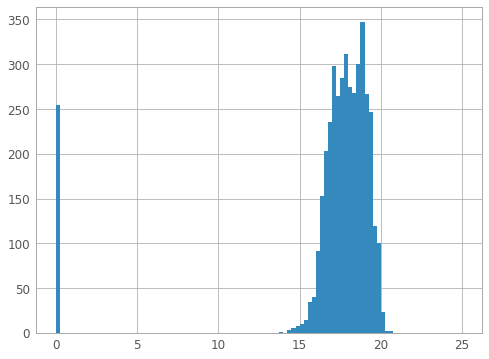

In [52]:
plt.hist(MASS, 100, (0, 25))

# Remove entries at 0


        

In [53]:
zero_mass = []

x = 0
for entry in MASS_list:
    if entry == 0:
        zero_mass.append(x)
    x += 1

x = 0
for entry in zero_mass:
    del MASS_list[entry + x]
    
    x -= 1

# Verify it worked

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   3.,   5.,   8.,  10.,  14.,  34.,  40.,  91., 153.,
        203., 235., 298., 265., 285., 312., 275., 268., 300., 347., 267.,
        247., 119., 100.,  23.,   2.,   2.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.]),
 array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,
         2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ,  4.25,
         4.5 ,  4.75,  5.  ,  5.25,  5.5 ,  5.75,  6.  ,  6.25,  6.5 ,
         6.75,  7.  ,  7.25,  7.5 ,  7.75,  8.  ,  8.25,  8.5 ,  8.75,
         9.  ,  9.25,  9.5 ,  9.75

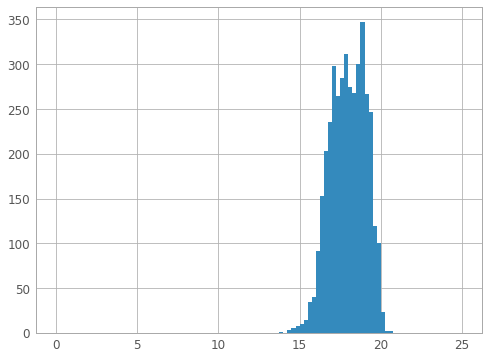

In [54]:
plt.hist(MASS_list, 100, (0, 25))

# Now we make sure that MASS_list and LOGG match

In [59]:
final_false_entry_list = []

final_false_entry_list.extend(zero_mass)
final_false_entry_list.extend(nums_to_be_taken_out_again_for_the_third_time)
final_false_entry_list.extend(nums_to_be_taken_out)


In [62]:
LOGG_for_mass_graph = []
x = 0

for entry in LOGG:
    if x in final_false_entry_list:
        True = True #Useless thing because python hates empty if statements and I couldnt figure out how to 
                    #not the above if statement
    else:
        LOGG_for_mass_graph.append(entry)
    x += 1

MASS_for_logg_graph = []

x = 0

for entry in MASS:
    if x in final_false_entry_list:
        True = True #same as above
    else:
        MASS_for_logg_graph.append(entry)
    x += 1

# Now to graph them

Text(0.5,0,'MASS')

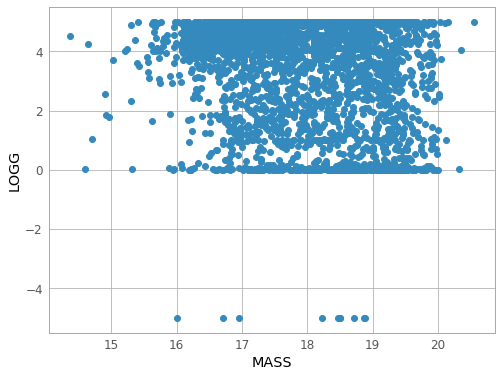

In [64]:
plt.scatter(MASS_for_logg_graph, LOGG_for_mass_graph)

plt.ylabel("LOGG")
plt.xlabel("MASS")

# Its odd that I'm still getting some negative LOGG. Not sure why.

In [69]:
off.close()